# Introduction

Some initial things about our project and the data

# Import Libraries

In [ ]:
#!pip install gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 45.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 10.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python-headless 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatib

In [1]:
import kagglehub
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
from transformers import AutoTokenizer
import getpass
import os
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedKFold, train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from gensim.models import Word2Vec
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sentence_transformers import SentenceTransformer
import torch

In [ ]:
import shap
from lime.lime_text import LimeTextExplainer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import make_pipeline

In [ ]:
# May be needed afterwards.
#!pip install transformers
#!pip install accelerate
#!pip install --upgrade jinja2
#!pip install -U sentence-transformers
#!pip install pandas
#!pip install numpy
#!pip install scikit-learn
#!pip install --upgrade bitsandbytes
#!pip install sentencepiece

# Download the dataset

In [ ]:
# Download latest version
# https://www.kaggle.com/datasets/snap/amazon-fine-food-reviews
path = kagglehub.dataset_download("tirendazacademy/fifa-world-cup-2022-tweets")
print("Path to dataset files:", path)

100%|██████████| 1.38M/1.38M [00:00<00:00, 104MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/tirendazacademy/fifa-world-cup-2022-tweets/versions/1


In [ ]:
# Load the dataset
data = pd.read_csv(path + "/fifa_world_cup_2022_tweets.csv", index_col=0)
print(data.shape)
data.head(10)

(22524, 5)


Date Created  Number of Likes      Source of Tweet  \
0  2022-11-20 23:59:21+00:00                4      Twitter Web App   
1  2022-11-20 23:59:01+00:00                3   Twitter for iPhone   
2  2022-11-20 23:58:41+00:00                1   Twitter for iPhone   
3  2022-11-20 23:58:33+00:00                1      Twitter Web App   
4  2022-11-20 23:58:28+00:00                0  Twitter for Android   
5  2022-11-20 23:57:32+00:00                0  Twitter for Android   
6  2022-11-20 23:57:06+00:00                0  Twitter for Android   
7  2022-11-20 23:57:05+00:00                0  Twitter for Android   
8  2022-11-20 23:56:10+00:00                1   Twitter for iPhone   
9  2022-11-20 23:56:08+00:00                0   Twitter for iPhone   

                                               Tweet Sentiment  
0  What are we drinking today @TucanTribe \n@MadB...   neutral  
1  Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive  
2  Worth reading while watching #WorldCup2022 htt...  positive  
3  Golden Maknae shinning bright\n\nhttps://t.co/...  positive  
4  If the BBC cares so much about human rights, h...  negative  
5  And like, will the mexican fans be able to scr...  negative  
6  Look like a only me and the Jamaican football ...   neutral  
7  Really? Football on a Monday morning at 9 and ...  negative  
8  As the World Cup starts in Qatar, it’s Black A...  positive  
9  #WorldCup2022 @ITVSport &amp; @LFSYSTEMMUSIC g...  positive

In [ ]:
# To Get the overall info ofcour data (data types, missing values, etc.)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22524 entries, 0 to 22523
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Date Created     22524 non-null  object
 1   Number of Likes  22524 non-null  int64 
 2   Source of Tweet  22524 non-null  object
 3   Tweet            22524 non-null  object
 4   Sentiment        22524 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.5+ MB


In [ ]:
data = data[['Tweet','Sentiment']]
data

Tweet Sentiment
0      What are we drinking today @TucanTribe \n@MadB...   neutral
1      Amazing @CanadaSoccerEN  #WorldCup2022 launch ...  positive
2      Worth reading while watching #WorldCup2022 htt...  positive
3      Golden Maknae shinning bright\n\nhttps://t.co/...  positive
4      If the BBC cares so much about human rights, h...  negative
...                                                  ...       ...
22519            Here We go World cup 2022 #WorldCup2022  positive
22520  Anderlecht confirms former Viborg FF's Jesper ...   neutral
22521  Great thread to read before the start of #Worl...  positive
22522  Raphinha wants Brazil to be united at the #Wor...  positive
22523  How to buy $SOT on PinkSale?🤔\n\nHave you been...   neutral

[22524 rows x 2 columns]

# Preprocessing

In [ ]:
# Drop the duplicates within data to avoid bias and clean data
print(data.shape)
data = data.drop_duplicates()

(22524, 2)


In [ ]:
#sanity check
print(data.shape)

(22360, 2)


In [ ]:
#check for null values. we dont have any.
data.isnull().sum()

Tweet        0
Sentiment    0
dtype: int64

In [ ]:
#EDA
countsentiment = data['Sentiment'].value_counts()
print(countsentiment)

Sentiment
positive    8425
neutral     8188
negative    5747
Name: count, dtype: int64


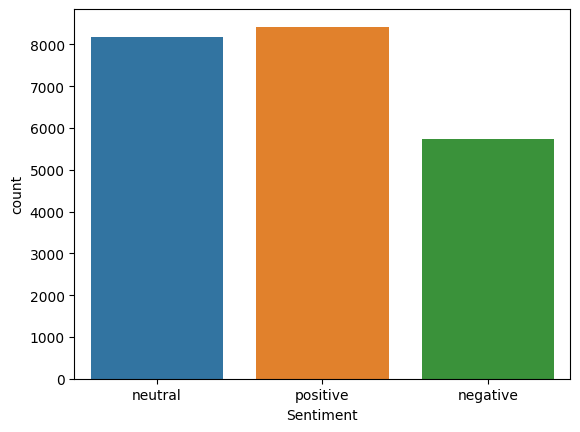

In [ ]:
#plot it in a scetterplot
sns.countplot(x='Sentiment', data = data, hue = 'Sentiment');

Some notes:
--we can see that most of the tweets are positive, followed by neutral. This may indicate us the enthusiasm and the positive expectation of the fans. As it seems to have created positive impressions.

In [ ]:
#Text preprocessing of the tweets
#lowercase the tweets
def lowercase_text(text):
    return str(text).lower()

In [ ]:
# Apply the function to tweets.
# Remember to reassign back to the same column for the changes to take effect.
# Preview your results
data['Tweet'] = data['Tweet'].apply(lowercase_text)
print("After lowercase transformation:")
rand_idxs = np.random.randint(0, len(data['Tweet']), size=10)
for idx in rand_idxs:
    print(f"Sentiment: {data['Sentiment'].iloc[idx]} - Tweet: {data['Tweet'].iloc[idx]}")

After lowercase transformation:
Sentiment: neutral - Tweet: convenient bit bit of var that for the host nation and fifa 👀 #worldcup2022 #qatarworldcup2022 #farce
Sentiment: neutral - Tweet: anyone else noticed this? #worldcup2022 #2022worldcup https://t.co/n5ja59e8tp
Sentiment: neutral - Tweet: 🏆 𝗡𝗘𝗪 𝗣𝗢𝗗𝗖𝗔𝗦𝗧 - '𝗕𝗔𝗖𝗞 𝗛𝗢𝗠𝗘' 🏆

h&amp;j kick off their daily #worldcup2022 podcast with:

😡 anger at the opening ceremony snub
😂 laughter at the alcohol songs
📺 and a helping of ally ross

 listen now ↓
https://t.co/p2nlp7bd3t
Sentiment: negative - Tweet: damn i’m gonna miss @shakira at the world cup #worldcup2022 #worldcupqatar2022
Sentiment: negative - Tweet: regretting not doing over 3.5 goals at this point #worldcup2022 #qatar2022 #qatecu
Sentiment: negative - Tweet: annnnnnnd the corruption has started #worldcup2022
Sentiment: neutral - Tweet: after 4 minutes, perhaps it is too early to start my hotties' list of the #worldcup2022. but i also have to speed up to pick a qatari one. they may no

/tmp/ipython-input-13-3970920050.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(lowercase_text)


In [ ]:
#stopwords removal
nltk.download('stopwords')
base_stopwords = set(stopwords.words('english'))
preserve = {'no', 'not', 'nor', 'never'}
custom_stopwords = base_stopwords - preserve
def remove_stopwords(text):
    words = str(text).split()
    filtered = [word for word in words if word not in custom_stopwords]
    result = ' '.join(filtered)

    if result != text:
        print(f"Before: {text}")
        print(f"After:  {result}\n")

    return result

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
data['Tweet'] = data['Tweet'].apply(remove_stopwords)
data['Tweet'].head()

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
iran has no national team this year in #worldcup2022‌ !

#kianpirfalak 
#mahsaamini 
#iranrevolution https://t.co/4vute8hhkv
After:  fuck football team islamic republic. iran no national team year #worldcup2022‌ ! #kianpirfalak #mahsaamini #iranrevolution https://t.co/4vute8hhkv

Before: i’m behind ghana and uruguay for the world cup. #fifaworldcup #worldcup2022 #qatarworldcup2022 https://t.co/4ye9oconn3
After:  i’m behind ghana uruguay world cup. #fifaworldcup #worldcup2022 #qatarworldcup2022 https://t.co/4ye9oconn3

Before: wouldn't mind if we were 6th.😁

#worldcup2022 ⚽️💪🏻
#poland 🇵🇱🇵🇱🇵🇱❤💪🏻 https://t.co/8ohrcvuhj7 https://t.co/bjxtgujxf1
After:  mind 6th.😁 #worldcup2022 ⚽️💪🏻 #poland 🇵🇱🇵🇱🇵🇱❤💪🏻 https://t.co/8ohrcvuhj7 https://t.co/bjxtgujxf1

Before: so exciting!!! #jungkook will be performing in the #worldcup2022 opening ceremony. the 1st korean artist to headline 💜💜💜💜💜💜💜
#btsarmy #btshistorymakers #bts_twt #fifaworldcup https://

/tmp/ipython-input-15-2244034832.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(remove_stopwords)


0    drinking today @tucantribe @madbears_ @lkinc_a...
1    amazing @canadasocceren #worldcup2022 launch v...
2    worth reading watching #worldcup2022 https://t...
3    golden maknae shinning bright https://t.co/4ay...
4    bbc cares much human rights, homosexual rights...
Name: Tweet, dtype: object

In [ ]:
#remove URLs, because they didn't add semantic value, and to preserve privacy.
url_pattern = r"(?:https?|ftp)://[^\s/$.?#].[^\s]*"

def replace_urls(text):
    text_str = str(text)
    replaced_text = re.sub(url_pattern, 'URL', text_str)

    if replaced_text != text_str:
        print(f"Before: {text_str}")
        print(f"After:  {replaced_text}\n")

    return replaced_text

In [ ]:
data['Tweet'] = data['Tweet'].apply(replace_urls)
data['Tweet'].head()

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
After:  fifa 2022 qatar world cup begins today!⚽ cheering #threelions prepare first game iran tomorrow!! 🦁🦁🦁 supporting?👀 #teamengland #fifaworldcup #worldcup2022 #qatar #fifaworldcup2022 #football URL

Before: can’t wait world cup kick today. ⚽ team supporting? share country's flag below. 👇 #cambridgedictionary #worldcup2022 #kickoff https://t.co/euomjzzre9
After:  can’t wait world cup kick today. ⚽ team supporting? share country's flag below. 👇 #cambridgedictionary #worldcup2022 #kickoff URL

Before: gm! enjoy sunday touch grass kickoff #worldcup2022 pulled carrots cold nights arrived! https://t.co/rpgmk5v6dt
After:  gm! enjoy sunday touch grass kickoff #worldcup2022 pulled carrots cold nights arrived! URL

Before: let’s unite support world cup year. support ? think win ? #ambank #worldcup2022 https://t.co/v6lutn9ye8
After:  let’s unite support world cup year. support ? think win ? #ambank #worldcup2022 URL

Before: #fifaworldcup

/tmp/ipython-input-17-204886720.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(replace_urls)


0    drinking today @tucantribe @madbears_ @lkinc_a...
1    amazing @canadasocceren #worldcup2022 launch v...
2             worth reading watching #worldcup2022 URL
3    golden maknae shinning bright URL #jeonjungkoo...
4    bbc cares much human rights, homosexual rights...
Name: Tweet, dtype: object

In [ ]:
#replace hastags & usernames for the same reasons.
def clean_mentions_hashtags(text):
    original = str(text)
    updated = original

    #Replace full email addresses
    updated = re.sub(r'\b[\w\.-]+@[\w\.-]+\.\w+\b', '', updated)

    #Replace users and hashtags
    updated = re.sub(r'@\w+|#\w+', '', updated)

    if updated != original:
        print(f"Before: {original}")
        print(f"After:  {updated}\n")


    return updated

In [ ]:
data['Tweet'] = data['Tweet'].apply(clean_mentions_hashtags)
data['Tweet'].head()

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
After:  wash sport public? deflect cost corrupt regime winner sport one that’s lost      URL

Before: ⚽️ finally! 22nd fifa world cup kicks today. qatar play ecuador opening match. history world cup, hosts never started tournament defeat – 16 wins 6 draws: URL #wc2022 #worldcup2022 #qatar2022 URL
After:  ⚽️ finally! 22nd fifa world cup kicks today. qatar play ecuador opening match. history world cup, hosts never started tournament defeat – 16 wins 6 draws: URL    URL

Before: spot palestinian flag ?✨🇵🇸 hours away 🇶🇦 #qatarworldcup2022 #worldcup2022 URL
After:  spot palestinian flag ?✨🇵🇸 hours away 🇶🇦   URL

Before: spirit #worldcup2022. watching world cup match, make sure also play match well. 🤪#gbagagbabitters 🌿 dey you. #backtotheroots #gbagagba. URL
After:  spirit . watching world cup match, make sure also play match well. 🤪 🌿 dey you.  . URL

Before: guess player world cup wins history? 🏆⚽️ #fifaworldcup #qatar2022 #worldcup #f

/tmp/ipython-input-19-219291766.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(clean_mentions_hashtags)


0                              drinking today      URL
1    amazing   launch video. shows much face canada...
2                          worth reading watching  URL
3      golden maknae shinning bright URL              
4    bbc cares much human rights, homosexual rights...
Name: Tweet, dtype: object

In [ ]:
#remove emojis without emoticons because they add sentiment
emoji_pattern = re.compile("["

    # Symbols & pictographs (e.g., 🔥🎉💡📦📱)
    u"\U0001F300-\U0001F5FF"

    # Transport & map symbols (e.g., 🚗✈️🚀🚉)
    u"\U0001F680-\U0001F6FF"

    # Flags (e.g., 🇺🇸🇬🇧🇨🇦 — these are pairs of regional indicators)
    u"\U0001F1E0-\U0001F1FF"

    # Dingbats (e.g., ✂️✈️✉️⚽)
    u"\u2700-\u27BF"

    # Supplemental Symbols & Pictographs (e.g., 🤖🥰🧠🦾)
    u"\U0001F900-\U0001F9FF"

    # Symbols & Pictographs Extended-A (e.g., 🪄🪅🪨)
    u"\U0001FA70-\U0001FAFF"

    # Miscellaneous symbols (e.g., ☀️☁️☂️⚡)
    u"\u2600-\u26FF"

    "]+", flags=re.UNICODE)

In [ ]:
def remove_emojis(text):
    if emoji_pattern.search(text):
        print(f"Before: {text}")
        text = emoji_pattern.sub('', text)
        print(f"After: {text}")
        print()
    return text

In [ ]:
data['Tweet'] = data['Tweet'].apply(remove_emojis)
data['Tweet'].head()

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
After: watch enjoy favorite games us nasinya grill &amp; restaurant          call whatsapp visit today 😊 0705889121    URL

Before:  let football talk 💪🏻&gt;&gt; no hypocrisy  ❤️
After:  let football talk &gt;&gt; no hypocrisy  ️

Before: so, result qatar ecuador world cup opener? 🔥🤔             
After: so, result qatar ecuador world cup opener?              

Before: ⚽️the fifa world cup 2022 kicks today!⚽️ 🏴󠁧󠁢󠁥󠁮󠁧󠁿bring home england! 🏴󠁧󠁢󠁥󠁮󠁧󠁿       URL
After: ️the fifa world cup 2022 kicks today!️ 󠁧󠁢󠁥󠁮󠁧󠁿bring home england! 󠁧󠁢󠁥󠁮󠁧󠁿       URL

Before: predictions formation starting lineup qatar go ecuador!👇 ~         URL
After: predictions formation starting lineup qatar go ecuador! ~         URL

Before: 🚨 world cup £50 giveaway! 🚨 bet builder opening game wins, give away winning amount one follower retweets tweet! 💷💷💷💷💷💷💷💷💷💷💷💷  🏆  URL
After:  world cup £50 giveaway!  bet builder opening game wins, give away winning amount one follow

/tmp/ipython-input-22-3524784530.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(remove_emojis)


0                              drinking today      URL
1    amazing   launch video. shows much face canada...
2                          worth reading watching  URL
3      golden maknae shinning bright URL              
4    bbc cares much human rights, homosexual rights...
Name: Tweet, dtype: object

In [ ]:
#remove non-alphabets
def clean_text(text, keep_punct=False):
    original = str(text)

    if keep_punct:
        # Keep only lowercase letters, spaces, and select punctuation (. ! ?), for capturing tone/sentiment
        cleaned = re.sub(r"[^a-z\s.!?]", "", original)
    else:
        # Keep only lowercase letters and spaces; remove all punctuation and symbols
        cleaned = re.sub(r"[^a-z\s]", "", original)

    # Normalize whitespace
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()

    if original != cleaned:
        print(f"Before: {text}")
        print(f"After:  {cleaned}\n")

    return cleaned

In [ ]:
data['Tweet'] = data['Tweet'].apply(lambda x: clean_text(x, keep_punct=True))

Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
After:  would love english football brass band medleys gay anthems icons. surely fans see great humour too. could anyone stop that?

Before: wash sport public? deflect cost corrupt regime winner sport one that’s lost      URL
After:  wash sport public? deflect cost corrupt regime winner sport one thats lost

Before: ️ finally! 22nd fifa world cup kicks today. qatar play ecuador opening match. history world cup, hosts never started tournament defeat – 16 wins 6 draws: URL    URL
After:  finally! nd fifa world cup kicks today. qatar play ecuador opening match. history world cup hosts never started tournament defeat wins draws

Before: spot palestinian flag ? hours away    URL
After:  spot palestinian flag ? hours away

Before: spirit . watching world cup match, make sure also play match well.   dey you.  . URL
After:  spirit . watching world cup match make sure also play match well. dey you. .

Before: guess player world cup wins his

/tmp/ipython-input-24-2274118247.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(lambda x: clean_text(x, keep_punct=True))


In [ ]:
def remove_consecutive_letters(text, max_repeat=2):
    text_str = str(text)
    pattern = r'(\w)\1{' + str(max_repeat) + r',}'
    cleaned = re.sub(pattern, r'\1' * max_repeat, text_str)

    if cleaned != text_str:
        print(f"Before: {text_str}")
        print(f"After:  {cleaned}\n")

    return cleaned

In [ ]:
data['Tweet'] = data['Tweet'].apply(lambda x: remove_consecutive_letters(x, max_repeat=2))

Before: day lets watch fooootttttbaaaaallllllll!
After:  day lets watch foottbaall!

Before: reviewing video even header pass player forward direction. went straight even looks like deflected goalie. offside? pffft...more like .
After:  reviewing video even header pass player forward direction. went straight even looks like deflected goalie. offside? pfft...more like .

Before: lets gooooooooo team usa!!!
After:  lets goo team usa!!!

Before: less hours go s first match.lets go boysssss!!!
After:  less hours go s first match.lets go boyss!!!

Before: lmaoooo saudi dey memorise quran blow everything .btstwt .btsbighit
After:  lmaoo saudi dey memorise quran blow everything .btstwt .btsbighit

Before: worldcupcryptomeme kkkkkkkkk
After:  worldcupcryptomeme kk

Before: lets fucking gollllllllll
After:  lets fucking goll

Before: lets go argentinaaaa lets hope best. goat deserves it.
After:  lets go argentinaa lets hope best. goat deserves it.

Before: watched prediction video thought show 

/tmp/ipython-input-26-3337271836.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(lambda x: remove_consecutive_letters(x, max_repeat=2))


In [ ]:
#Lemmatization
# Download required NLTK resources
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')

# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [ ]:
# POS mapping function
# POS tags can be: ADJ (adjective), ADV (adverb), NOUN (noun), VERB (verb), etc
def get_wordnet_pos(tag):
    # Determine the WordNet POS tag based on the first letter of the input tag
    if tag.startswith('J'):
        return wordnet.ADJ  # Adjective
    elif tag.startswith('V'):
        return wordnet.VERB  # Verb
    elif tag.startswith('N'):
        return wordnet.NOUN  # Noun
    elif tag.startswith('R'):
        return wordnet.ADV  # Adverb
    else:
        return wordnet.NOUN  # Default to Noun if no match


def lemmatize_text(text):
    original_text = str(text)
    # Split the text into individual words
    words = original_text.split()
    # Obtain Part of Speech (POS) tags for each word
    pos_tags = pos_tag(words)

    # Initialize lists to store lemmatized words and any changes
    lemmatized_words = []
    changes = []

    # Iterate over each word and its POS tag
    for word, tag in pos_tags:
        # Map the POS tag to a WordNet POS tag
        wn_tag = get_wordnet_pos(tag)
        # Lemmatize the word using the mapped POS tag
        lemma = lemmatizer.lemmatize(word, wn_tag)

        # Check if the lemmatized word is different from the original
        if lemma != word:
            # Record the change if a difference is found
            changes.append((word, lemma, tag))
        # Add the lemmatized word to the list
        lemmatized_words.append(lemma)

    # Join the lemmatized words back into a single string
    result = ' '.join(lemmatized_words)

    if changes:
        print(f"\nOriginal: {original_text}")
        print(f"Lemmatized: {result}")
        for original, lemma, pos in changes:
            print(f"  - {original} → {lemma}  (POS: {pos})")

    return result

In [ ]:
nltk.download('averaged_perceptron_tagger_eng')
data['Tweet'] = data['Tweet'].apply(lemmatize_text)
data['Tweet']

[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Η έξοδος ροής περικόπηκε στις τελευταίες 5000 γραμμές.
  - biggest → big  (POS: JJS)
  - lets → let  (POS: VBZ)

Original: carry quatar airline ads given news coverage rightly exposes oppression exploitation society?
Lemmatized: carry quatar airline ad give news coverage rightly expose oppression exploitation society?
  - ads → ad  (POS: NNS)
  - given → give  (POS: VBN)
  - exposes → expose  (POS: VBZ)

Original: song crazy! captures emotion well. amount people not listening song made makes sad
Lemmatized: song crazy! capture emotion well. amount people not listen song make make sad
  - captures → capture  (POS: VBZ)
  - listening → listen  (POS: VBG)
  - made → make  (POS: VBD)
  - makes → make  (POS: VBZ)

Original: years ago! remember britney fifa world cup commercial pepsi
Lemmatized: year ago! remember britney fifa world cup commercial pepsi
  - years → year  (POS: NNS)

Original: check captaincy works best options md!
Lemmatized: check captaincy work best option md!
  - works → 

/tmp/ipython-input-29-2567611865.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Tweet'] = data['Tweet'].apply(lemmatize_text)


0                                           drinking today
1        amaze launch video. show much face canada mens...
2                                         worth read watch
3                                golden maknae shin bright
4        bbc care much human right homosexual right wom...
                               ...                        
22519                                         go world cup
22520    anderlecht confirm former viborg ffs jesper fr...
22521                              great thread read start
22522                          raphinha want brazil united
22523    buy sot pinksale? confuse buy token pinksale s...
Name: Tweet, Length: 22360, dtype: object

In [ ]:
data.head(5)

Tweet Sentiment
0                                     drinking today   neutral
1  amaze launch video. show much face canada mens...  positive
2                                   worth read watch  positive
3                          golden maknae shin bright  positive
4  bbc care much human right homosexual right wom...  negative

In [ ]:
Tweet = data["Tweet"]
Sentiment = data["Sentiment"]

In [ ]:
Tweet.head(5)

0                                       drinking today
1    amaze launch video. show much face canada mens...
2                                     worth read watch
3                            golden maknae shin bright
4    bbc care much human right homosexual right wom...
Name: Tweet, dtype: object

In [ ]:
# Tokenize the corpus
tokenized_corpus = [comment.lower().split() for comment in Tweet]
tokenized_corpus

[['drinking', 'today'],
 ['amaze',
  'launch',
  'video.',
  'show',
  'much',
  'face',
  'canada',
  'mens',
  'national',
  'team',
  'change',
  'since',
  'last',
  'world',
  'cup',
  'entry',
  '.',
  'cant',
  'wait',
  'see',
  'boy',
  'action!',
  'canada',
  'fifa',
  'world',
  'cup',
  'open',
  'video'],
 ['worth', 'read', 'watch'],
 ['golden', 'maknae', 'shin', 'bright'],
 ['bbc',
  'care',
  'much',
  'human',
  'right',
  'homosexual',
  'right',
  'woman',
  'right',
  'not',
  'say',
  'open',
  'ceremony??',
  'say',
  'open',
  'ceremony??',
  'bbc',
  'censor',
  'open',
  'ceremony??'],
 ['like',
  'mexican',
  'fan',
  'able',
  'scream',
  'puto',
  'now?',
  'homophobic',
  'qatar?'],
 ['look', 'like', 'jamaican', 'football', 'team', 'naw', 'follow', 'worldcup'],
 ['really?',
  'football',
  'monday',
  'morning',
  '?',
  'need',
  'pinch',
  'myself.',
  'really',
  'happening?'],
 ['world',
  'cup',
  'start',
  'qatar',
  'it',
  'black',
  'awareness',
 

In [ ]:
#VECTORIZATION
Tweet = data['Tweet']
Sentiment = data['Sentiment']
print(Tweet)
Sentiment

0                                           drinking today
1        amaze launch video. show much face canada mens...
2                                         worth read watch
3                                golden maknae shin bright
4        bbc care much human right homosexual right wom...
                               ...                        
22519                                         go world cup
22520    anderlecht confirm former viborg ffs jesper fr...
22521                              great thread read start
22522                          raphinha want brazil united
22523    buy sot pinksale? confuse buy token pinksale s...
Name: Tweet, Length: 22360, dtype: object


0         neutral
1        positive
2        positive
3        positive
4        negative
           ...   
22519    positive
22520     neutral
22521    positive
22522    positive
22523     neutral
Name: Sentiment, Length: 22360, dtype: object

In [ ]:
# we use the LabelEncoder() in order to map the classes 'positive', 'neutral' and 'negative' to numerical values

le = LabelEncoder()
Sentiment = le.fit_transform(Sentiment)
Sentiment

array([1, 2, 2, ..., 2, 2, 1])

# Embeddings

# Word2Vec

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Tweet, Sentiment, random_state = 42, stratify = Sentiment)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)

X_train shape:  (16770,)
X_test shape:  (5590,)


In [ ]:
# Tokenize the text data for Word2Vec
tokenized_train = [text.split() for text in X_train]
tokenized_test = [text.split() for text in X_test]

In [ ]:
# Train the Word2Vec model
w2v_model = Word2Vec(
    sentences=tokenized_corpus,  # tokenized sentences
    vector_size=100,             # size of word vectors
    window=5,                    # context window size
    min_count=2,                 # ignore rare words
    workers=4,                   # for parallel training
    sg=1                         # 1 for skip-gram; 0 for CBOW
)
print("Training Word2Vec model...")
# Train the model
w2v_model.train(
    tokenized_train, # List of sentences to train
    total_examples=len(tokenized_train), # Number of sentences to train on
    epochs=10 # Number of epochs
)

Training Word2Vec model...


(1207208, 1502650)

In [ ]:
print(f"Vocabulary size: {len(w2v_model.wv.key_to_index)}")

Vocabulary size: 8765


In [ ]:
#create document vectors by averaging word vectors
def document_vector(doc, model):
    # Filter words that are in the model vocabulary
    doc_words = [word for word in doc if word in model.wv]
    if len(doc_words) == 0:
        # Return zeros if no words are in vocabulary
        return np.zeros(model.vector_size)
    # Return the mean of all word vectors in the document
    return np.mean([model.wv[word] for word in doc_words], axis=0)

In [ ]:
# Create document vectors for training and testing sets
X_train = np.array([document_vector(doc, w2v_model) for doc in tokenized_train])
X_test = np.array([document_vector(doc, w2v_model) for doc in tokenized_test])

In [ ]:
X_train

array([[-0.50888938,  0.40969843,  0.1362166 , ..., -0.15462491,
         0.14042264, -0.36692417],
       [-0.51517117,  0.03912063, -0.15563849, ..., -0.19334358,
        -0.13534521,  0.09754322],
       [-0.32017043,  0.28224549,  0.06140069, ..., -0.14624093,
         0.15507545, -0.16486841],
       ...,
       [-0.20312682,  0.01003276, -0.01710153, ..., -0.06933264,
         0.0516479 ,  0.02719091],
       [-0.2560626 ,  0.10864943,  0.10775683, ..., -0.07046111,
        -0.01571901, -0.25444582],
       [-0.43782592,  0.30814287,  0.34875432, ...,  0.12228084,
        -0.16757016, -0.2129178 ]])

In [ ]:
print(f"Training Word2Vec matrix shape: {X_train.shape}")
print(f"Testing Word2Vec matrix shape: {X_test.shape}")

Training Word2Vec matrix shape: (16770, 100)
Testing Word2Vec matrix shape: (5590, 100)


In [ ]:
# Explore some word similarities
my_test_word = "amazing" #amazing for example.
try:
    # Find words most similar
    print(f"\nWords most similar to '{my_test_word}':")
    for word, similarity in w2v_model.wv.most_similar(my_test_word, topn=5):
        print(f"{word}: {similarity:.4f}")
except KeyError:
    print(f"Word '{my_test_word}' not in vocabulary. Try another common word.")


Words most similar to 'amazing':
eager: 0.7643
performance!: 0.7589
wonderful: 0.7570
awesome!: 0.7384
fr: 0.7357


In [ ]:
# Get the word embeddings
word_embeddings = w2v_model.wv
words = word_embeddings.index_to_key

--> Plotly and PCA will probably take more time --> more than 10 min

In [ ]:
# Plotly heatmap
import plotly.express as px
def visualize_similarity_matrix(similarity_df):
    fig = px.imshow(similarity_df, labels=dict(x="Words", y="Words", color="Similarity"), x=similarity_df.columns, y=similarity_df.index, color_continuous_scale="Viridis")
    fig.update_layout(title="Word Similarity Matrix", xaxis_tickangle=-45, width=800, height=800)
    fig.show()

In [ ]:
# Similarity matrix
# Create a similarity matrix manually since KeyedVectors doesn't have similarity_matrix attribute
import numpy as np
words = word_embeddings.index_to_key
similarity_matrix = np.zeros((len(words), len(words)))

for i, word1 in enumerate(words):
    for j, word2 in enumerate(words):
        if word1 != word2:
            similarity_matrix[i, j] = word_embeddings.similarity(word1, word2)

# Create a DataFrame for the similarity matrix
similarity_df = pd.DataFrame(similarity_matrix, index=words, columns=words)
visualize_similarity_matrix(similarity_df)

KeyboardInterrupt: 

In [ ]:
def visualize_2d_plot(df):
    # Create a scatter plot using Plotly
    fig = px.scatter(df, x='C1', y='C2', text='doc', title='Visualization of Word Embeddings', labels=["Component 1", "Component 2"])

    # Improve the layout
    fig.update_traces(textposition='top center', marker=dict(size=10, opacity=0.8), mode='markers+text')
    fig.update_layout(width=900, height=700, xaxis=dict(title='Component 1'), yaxis=dict(title='Component 2'))

    # Show the plot
    fig.show()

In [ ]:
type(word_embeddings)

gensim.models.keyedvectors.KeyedVectors

In [ ]:
# PCA plot
from sklearn.decomposition import PCA

# Initialize PCA with 2 components
pca = PCA(n_components=2)

# Fit PCA on the word embeddings
pca.fit(word_embeddings.vectors)

# Transform the word embeddings using PCA
word_embeddings_2d = pca.transform(word_embeddings.vectors)

# Create a DataFrame for the 2D embeddings
pca_df = pd.DataFrame(
    word_embeddings_2d,
    columns=['C1', 'C2']
)
pca_df['doc'] = words
visualize_2d_plot(pca_df)

# Transformers Embeddings

In [ ]:
os.environ['HF_TOKEN'] = ""

In [ ]:
os.environ["HF_HOME"] = r"C:\my_hf_models"

In [ ]:
if torch.cuda.device_count()>0:
    my_device = "cuda"
    print(f"You have {torch.cuda.device_count()} GPUs available.")
else:
    my_device = "cpu"
    print("You have no GPUs available. Running on CPU.")

You have no GPUs available. Running on CPU.


In [ ]:
# https://huggingface.co/sentence-transformers/all-MiniLM-L6-v2
embeddings_model = SentenceTransformer('sentence-transformers/all-MiniLM-L6-v2',
                                       token=os.environ["HF_TOKEN"],
                                       cache_folder=os.environ["HF_HOME"],
                                       device=my_device)

In [ ]:
Tweet.head(5)

0                                       drinking today
1    amaze launch video. show much face canada mens...
2                                     worth read watch
3                            golden maknae shin bright
4    bbc care much human right homosexual right wom...
Name: Tweet, dtype: object

In [ ]:
word_embeddings_transformer = embeddings_model.encode(Tweet.tolist())
print(word_embeddings_transformer.shape)
word_embeddings_transformer

(22360, 384)


array([[-0.00520791,  0.06893407,  0.00294818, ...,  0.0196458 ,
         0.01778261,  0.04273417],
       [-0.02288043, -0.01128389,  0.03779256, ..., -0.07340065,
        -0.03058689, -0.0084123 ],
       [ 0.01015392, -0.02619711, -0.03331236, ..., -0.08764387,
        -0.0178343 ,  0.0144361 ],
       ...,
       [ 0.01908801, -0.05099883, -0.00768831, ...,  0.05614876,
        -0.00575515,  0.01198637],
       [-0.00596248,  0.01248954, -0.09430588, ..., -0.01707178,
         0.02068603, -0.03305008],
       [-0.02285524, -0.02366124,  0.02821772, ..., -0.0140533 ,
        -0.01646058, -0.01497528]], dtype=float32)

In [ ]:
Tweet.info()

<class 'pandas.core.series.Series'>
Index: 22360 entries, 0 to 22523
Series name: Tweet
Non-Null Count  Dtype 
--------------  ----- 
22360 non-null  object
dtypes: object(1)
memory usage: 865.4+ KB


In [ ]:
word_embeddings = word_embeddings_transformer

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(word_embeddings, Sentiment, test_size=0.2, random_state=42)

In [ ]:
print(f"Training Word2Vec matrix shape: {X_train.shape}")
print(f"Testing Word2Vec matrix shape: {X_test.shape}")

Training Word2Vec matrix shape: (17888, 384)
Testing Word2Vec matrix shape: (4472, 384)


# SUPERVISED LEARNING

In [ ]:
#SUPERVISED LEARNING
#instatiate a df to compare all the evaluation results of performance of our models
clf_results = pd.DataFrame([])

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
y_pred_svm = SVCmodel.predict(X_test)

In [ ]:
# Print the classification report
print(metrics.classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1437
           1       0.60      0.61      0.61      2047
           2       0.69      0.70      0.70      2106

    accuracy                           0.64      5590
   macro avg       0.64      0.64      0.64      5590
weighted avg       0.64      0.64      0.64      5590



In [ ]:
# Add the results of the SVC classifier into clf_results df

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Linear SVC model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_svm), 3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_svm, average='weighted'), 3)})])

clf_results

Model  Accuracy     F1
0  Linear SVC model     0.641  0.641

In [ ]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[ 862,  358,  217],
       [ 356, 1247,  444],
       [ 170,  462, 1474]], dtype=int64)

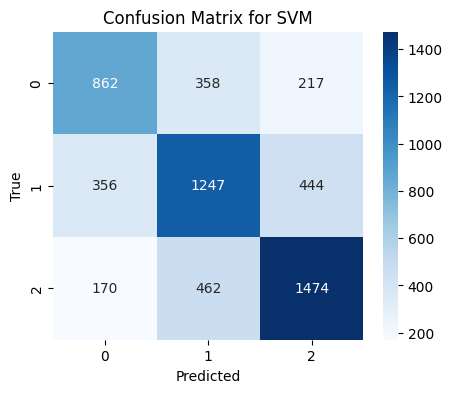

In [ ]:
#plot it in a heatmap
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for SVM')
plt.show()

In [ ]:
# from the matrix above we can see that the model correctly classified a large number of the three classes, however it keeps struggle in some predictions

# Logistic Regression

In [ ]:
#logistic regression
lr_model = LogisticRegression(
    multi_class='multinomial',  # Multinomial for multi-class problems
    solver='lbfgs',             # Efficient solver for multinomial logistic regression
    max_iter=1000,              # Increase max iterations to ensure convergence
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores
)

# Train the model
print("Training Logistic Regression model...")
lr_model.fit(X_train, y_train)
# Make predictions
y_pred_lr = lr_model.predict(X_test)
print("\nClassification Report:")
print(metrics.classification_report(y_test, y_pred_lr))


Training Logistic Regression model...


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.60      0.61      1437
           1       0.59      0.62      0.60      2047
           2       0.71      0.70      0.70      2106

    accuracy                           0.64      5590
   macro avg       0.64      0.64      0.64      5590
weighted avg       0.64      0.64      0.64      5590



In [ ]:
# Add the results of the Logistic Regression classifier into clf_results df

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'Logistic Regression model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_lr), 3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_lr, average='weighted'), 3)})])

clf_results

In [ ]:
# Confusion Matrix of LR
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [ ]:
#XGBoost Model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
# Make predictions
y_pred_xgb = xgb_model.predict(X_test)
# Display detailed classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

In [ ]:
# Add the results of the XGB classifier into clf_results df

clf_results = pd.concat([clf_results, pd.json_normalize({'Model': 'XGBoost model',
                                                         'Accuracy': round(metrics.accuracy_score(y_test, y_pred_xgb), 3),
                                                         'F1': round(metrics.f1_score(y_test, y_pred_xgb, average='weighted'), 3)})])

clf_results

In [ ]:
# Confusion Matrix of XGB
plt.figure(figsize=(5, 4))
cm = confusion_matrix(y_test, y_pred_xgb)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(set(y_test)),
            yticklabels=sorted(set(y_test)))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for XGBoost')
plt.show()

In [ ]:
#compare the models
clf_results.sort_values(by='F1', ascending=False, inplace=True)
clf_results

In [ ]:
#xgb has the best performance

# Lime Explainability

In [ ]:
#VECTORIZATION
Tweet = data['Tweet']
Sentiment = data['Sentiment']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(Tweet, Sentiment, test_size=0.2, random_state=7, stratify=Sentiment)

In [ ]:
vectorizer = TfidfVectorizer(min_df=10)
X_train_vec = vectorizer.fit_transform(X_train).toarray()
X_test_vec = vectorizer.transform(X_test).toarray()

In [ ]:
print(len(y_train), len([t for t in y_train if t])) # 20000 10000
print(len(y_test), len([t for t in y_test if t])) # 5000 2500

17888 17888
4472 4472


In [ ]:
model = LogisticRegression(
    multi_class='multinomial',  # Multinomial for multi-class problems
    solver='lbfgs',             # Efficient solver for multinomial logistic regression
    max_iter=1000,              # Increase max iterations to ensure convergence
    random_state=42,            # For reproducibility
    n_jobs=-1                   # Use all available cores
)
model.fit(X_train_vec, y_train)

pipeline = make_pipeline(vectorizer, model)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


In [ ]:
class_names = ['negative', 'positive', 'neutral']

explainer = LimeTextExplainer(class_names=class_names)

In [ ]:
X_test.head(20)

3667      look gonna stoning couple beheading doha tonight
8871                                            hand stack
4264                                              attitude
8927                                                   fix
13517    chaos disaster deaths war suffer experienced w...
6792        offside?? wtf ref aware ecuador yellow right??
20682    whether hold qatar shouldnt hold many country ...
14932                                            jung bts!
5954                        let go! first match! qat v ecu
19152                                            go either
18754    back net? not quite hard job recruit ahead ! n...
4536     one happy quatar humiliate right backyard? qat...
7228            ive never see bizarre offside call before!
780      anyone expect keep word anything let alone sho...
4218     team look wellplaced win ahead ? stuck favouri...
17179    begin qatarecuador bingo hold nfts today winne...
21909    benzema injure giroud likely lead frence line ...
2306                      defeat right world. honour it...
21793    manchester unite reportedly consider terminate...
20311                           world cup mood! good luck!
Name: Tweet, dtype: object

# Positive Comment

In [ ]:
ind = 20311
text = X_test[ind]
print(text)

world cup mood! good luck!


In [ ]:
exp = explainer.explain_instance(text, pipeline.predict_proba, num_features=6)
exp.show_in_notebook(text=True)